# Challenge 1_ Diabetes EDA y K-NN

Este challenge va a poner a prueba lo que habeis aprendido sobre EDA y ver si habeis entendido el algoritmo KNN y sabeis construirlo con Scikit-learn.

Para ello vamos a usar el famoso conjunto de datos Pima Indians Diabetes Database que podéis encontrar en Kaggle.

Este conjunto de datos proviene originalmente del National Institute of Diabetes and Digestive and Kidney Diseases de los Estados Unidos. A la hora de seleccionar las instancias que componen este conjunto de datos se han impuesto una serie de restricciones, siendo en este caso todos los pacientes mujeres de al menos 21 años y de herencia indígena pima.

Las columnas con las que vamos a trabajar son:

**Pregnancies** - Número de embarazos previos

**Glucose** - Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa

**BloodPressure** - Presión arterial diastólica (mm de Hg)

**SkinThickness** - Grosor del pliegue cutáneo del tríceps (mm)

**Insulin** - Insulina sérica de 2 horas (U/ml)

**BMI** - Índice de masa corporal (peso en kg/(altura en m)^2)

**DiabetesPedigreeFunction** - Función que puntúa la probabilidad de diabetes en función de los antecedentes familiares

**Age** - Edad en años

**Outcome** - Clase que debemos predecir (0 - No tiene diabetes o 1 - Tiene diabetes)

In [40]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

Carga el CSV con pandas en un dataframe llamado data

In [41]:
# Una linea de codigo
data = pd.read_csv("diabetes.csv")

Muestra las primeras 5 columnas del dataframe

In [42]:
# Una linea de codigo
data.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Renombra TODAS las columnas de acuerdo con el enunciado del challenge

In [43]:
# Una linea de codigo
data = data.rename(columns={'pregnancies': 'Pregnancies', 'glucose': 'Glucose', 'diastolic': 'BloodPressure', 'triceps': 'SkinThickness', 'insulin': 'Insulin', 'bmi': 'BMI', 'dpf': 'DiabetesPedigreeFunction', 'age': 'Age', 'diabetes': 'Outcome'})

Comprueba el cambio

In [44]:
# Una linea de codigo
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Imprime el numero de filas y columnas que tenemos con una unica linea

In [45]:
# Una linea de codigo
print(f"Tenemos {data.shape[0]} filas y {data.shape[1]} columnas")

Tenemos 768 filas y 9 columnas


Informacion general del dataset

In [46]:
# Una linea de codigo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Muestra los valores unicos en cada columna

In [47]:
# Una linea de codigo
data.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


Comprueba la existencia de valores nulos en el dataset

In [48]:
# Una linea de codigo
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Muestra una descripcion estadistica basica del dataset

In [49]:
# Una linea de codigo
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Mostar datos categoricos

In [50]:
# Tres lineas de codigo
for column in data.columns:
    if data[column].dtype == "object":
        print(f"The colum '{column}' is a Categorical type.")

**NO** os está saliendo mal, es porque no hay datos categoricos

Mostrar los datos numéricos

In [51]:
# Una linea de codigo
data.select_dtypes(include=np.number).columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Analisis exploratorio de la variable objetivo
La variable objetivo es aquiella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado df que sea una copia del original.

In [52]:
# Una linea de codigo
df = data.copy()

Cambia el nombre de la variable objetivo "outocome" por "diabetes"  y comprueba

In [53]:
# Dos linea de codigo
df = df.rename(columns={'Outcome': 'diabetes',})

Vamos a hacer una "chapucilla".Cambiad en diabetes los 0 por "no" y los 1 por "si"

In [54]:
# Una linea de codigo
df['diabetes'] = df['diabetes'].map({1 : 'yes', 0 : 'no'})
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


Vamos a hacer ahora un countplot (echad un ojo en la libreria seaborn) y ¿que conclusion sacas?


Como se puede observar en el gráfico inferior, hay una discrepancia entre los datos que dan positivo y negativo para diabetes. El número de personas que sí tienen diabetes es aproximadamente la mitad de las que no la tienen; por lo tanto, el conjunto de datos está desbalanceado.

<Axes: xlabel='diabetes', ylabel='count'>

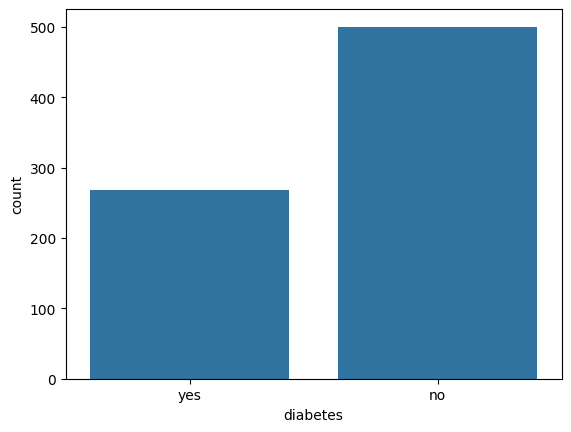

In [55]:
# Una linea de codigo
# Pista: decimos que queremos un countplot, que datos queremos representar y de donde vienen
sns.countplot(df, x="diabetes")

Vuelve a poner las variables que hemos cambiado como 0 y como 1

In [56]:
# Una linea de codigo
df['diabetes'] = df['diabetes'].map({'yes': 1, 'no': 0})

Ahora vamos a ver otras variables que pueden ser importantes, por ejemplo la edad.
Lo representamos en un Countplot

Text(0.5, 1.0, 'Distribution of users per age')

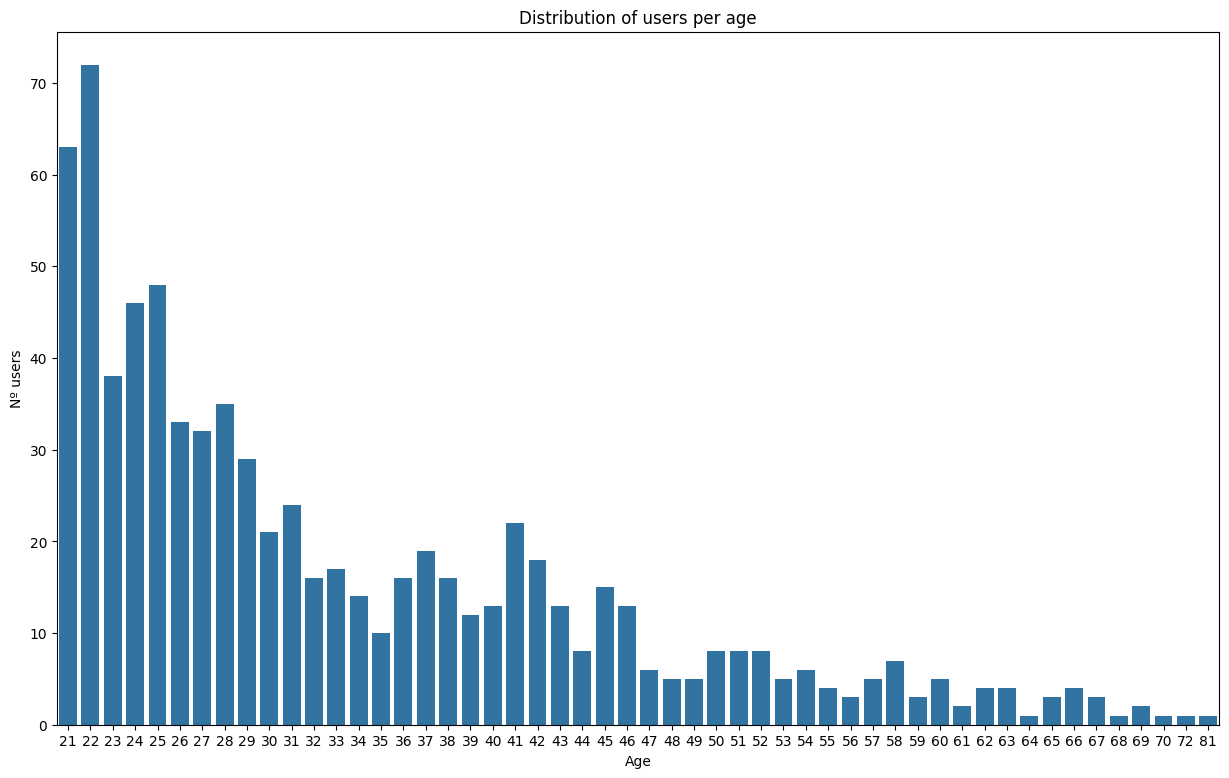

In [57]:
# Primero fijamos el tamaño de la figura
# Una linea de codigo
plt.figure(figsize=(15, 9))
# Decimos que queremos un countplot, que datos queremos representar y de donde vienen
# Una linea de codigo
sns.countplot(df, x="Age")
# Título del eje X
# Una linea de codigo
plt.xlabel('Age')
# Título del eje Y
# Una linea de codigo
plt.ylabel('Nº users')
# Título del gráfico
# Una linea de codigo
plt.title('Distribution of users per age')

Ahora toca algo mas complejo. Usar un **pairplot** para mostrar la distribucion y las relaciones de las variables numericas en la variable de salida.

Si quereis saber como interpretar y/o hacer este tipo de graficos, os dejamos links abajo:
--> https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6#:~:text=Pair%20plot%20is%20used%20to,separation%20in%20our%20data%2Dset.

--> https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

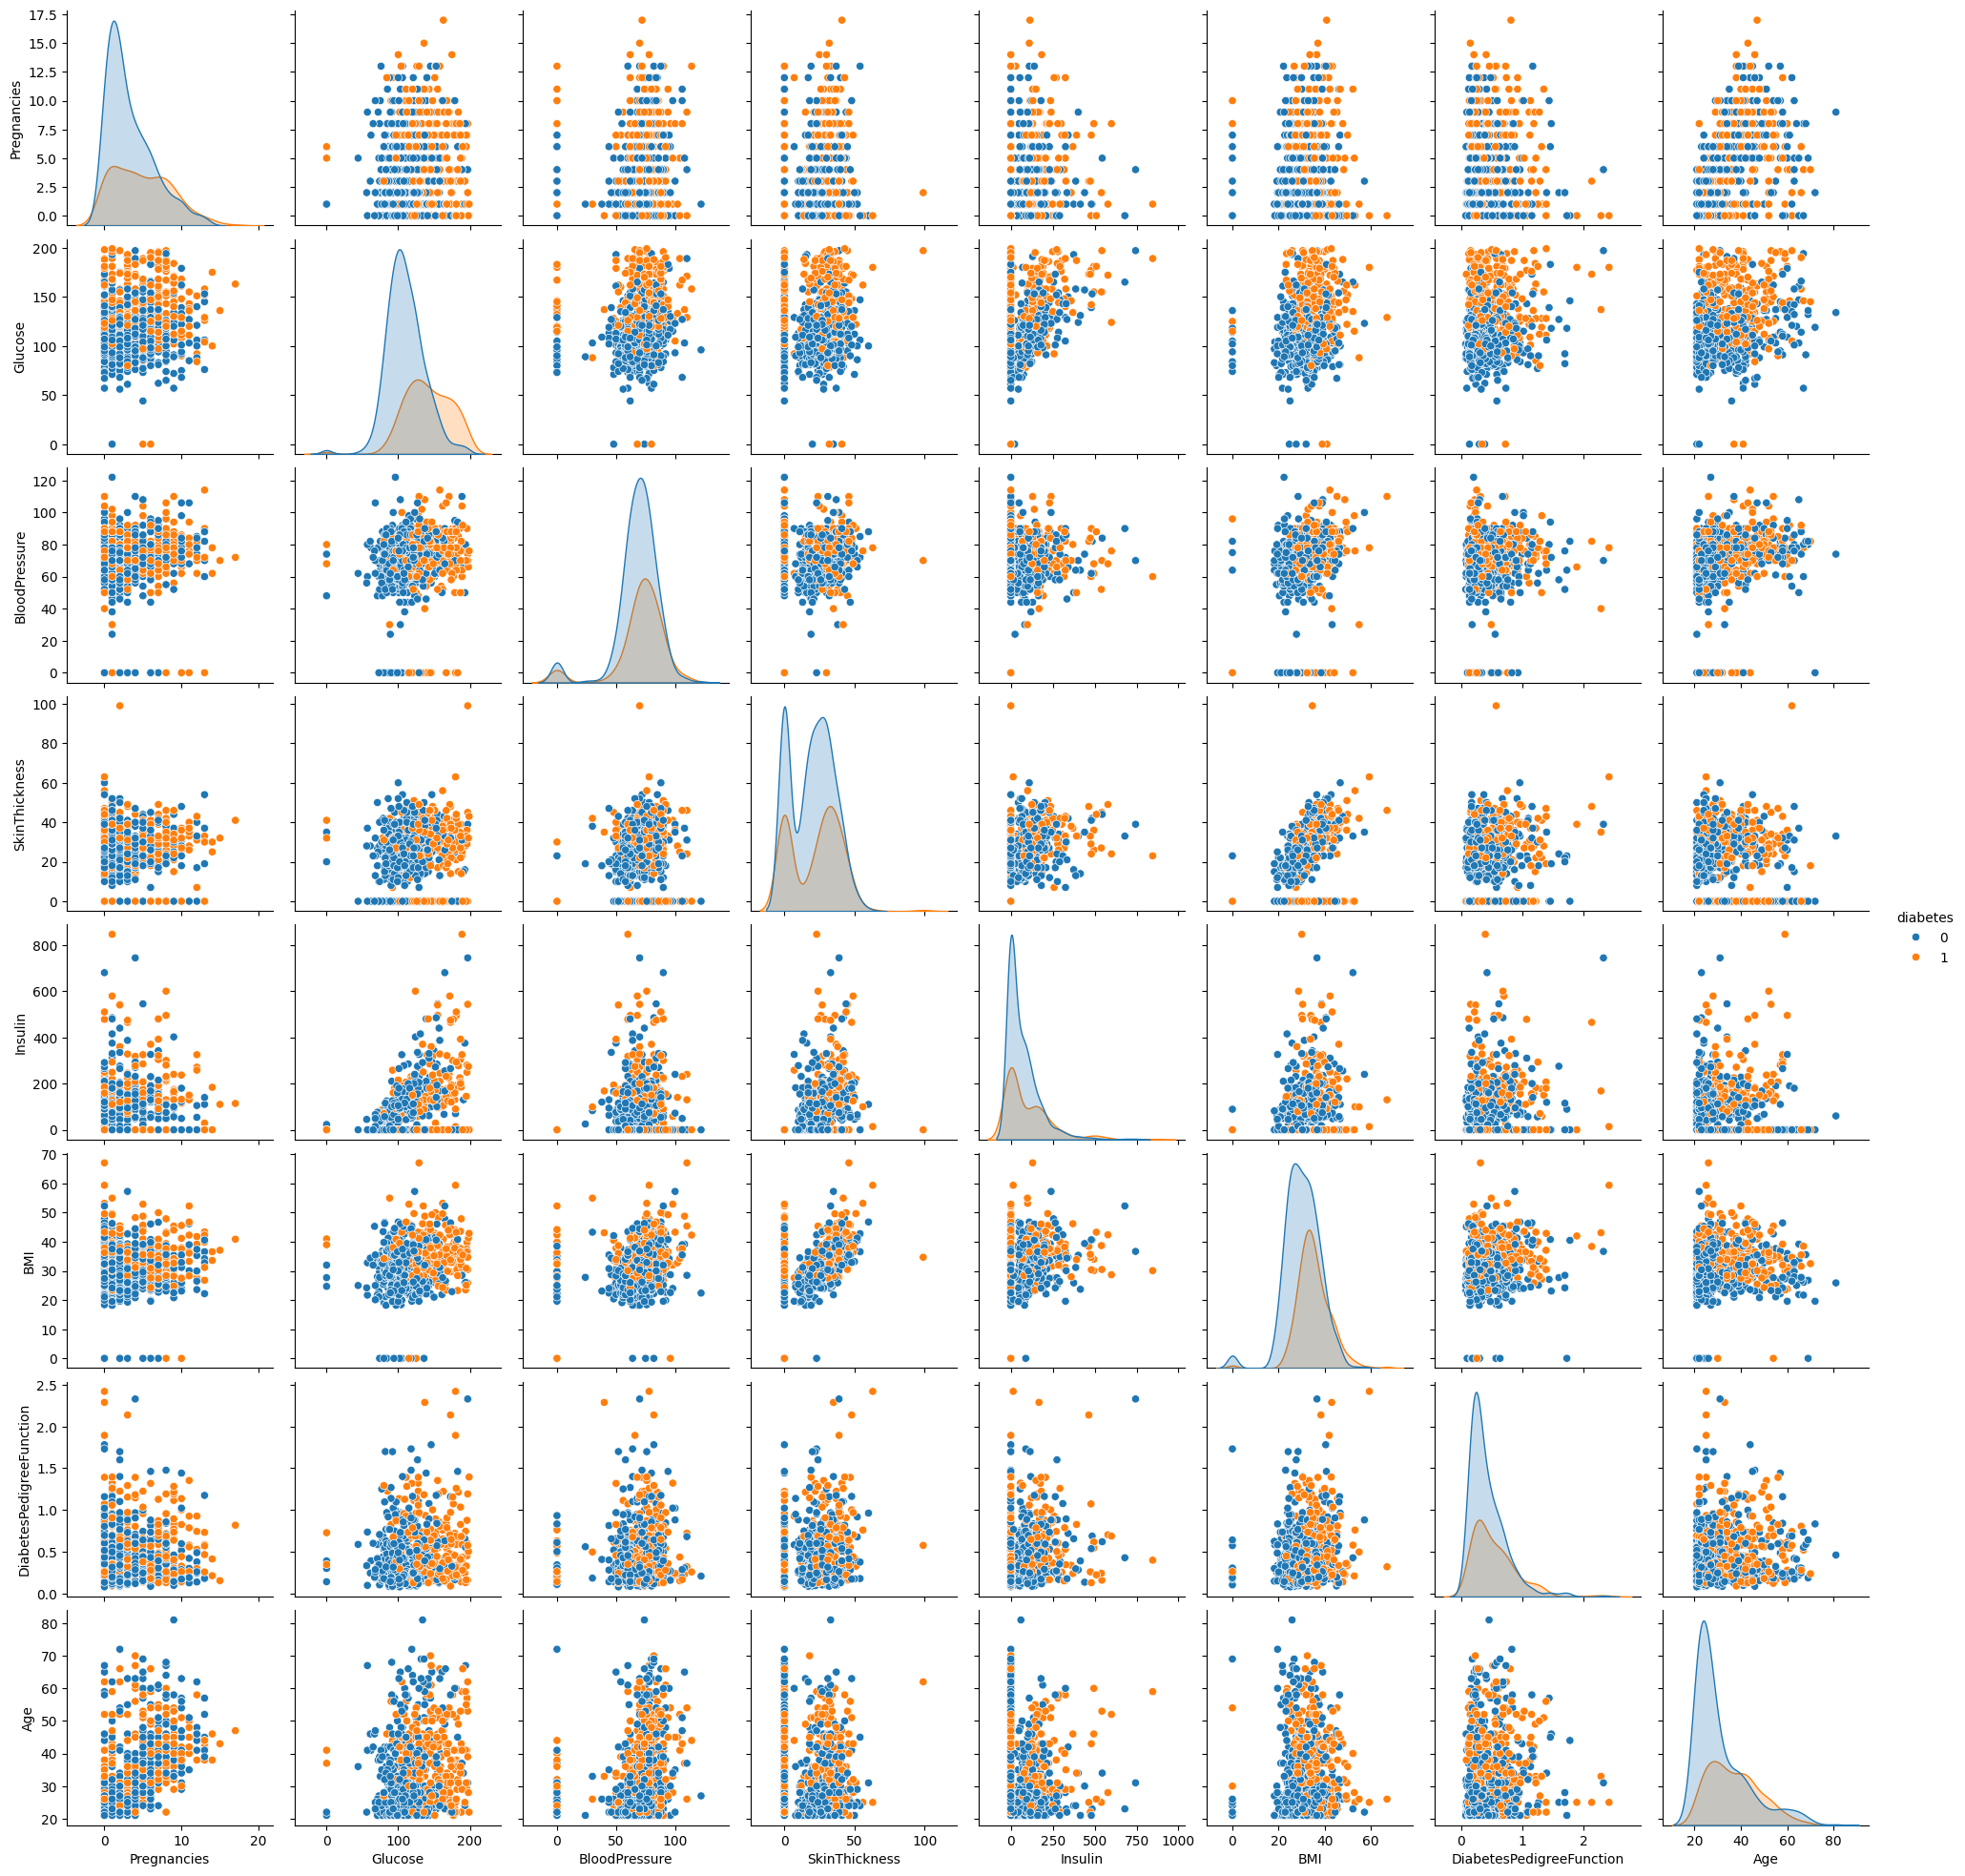

In [58]:
# Una linea de codigo
sns.pairplot(data = df, hue='diabetes')

Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset.
**Pregunta:** ¿qué conclusiones sacas de ellas?

Del grafico inferior podemos sacar la siguientes conclusiones:


1.   Tenemos valores anómalos para la presión de la sangre. Puede darse a un problema de calidad de los datos
2.   La mayoría de las pacientes se concentran en el rango de 20-50 años
3.   No hay una correlación lineal fuerte visible entre la edad y la presión arterial en este dataset
4.   Si ignoramos los valores 0 y extremos, la mayoría de las mediciones caen en el rango 60-90 mmHg, que es razonable para presión diastólica

### Nota nobre la calidad del dato

Antes de cualquier análisis predictivo, sería necesario imputar o eliminar los valores 0 en BloodPressure, ya que distorsionarían cualquier modelo de machine learning.

<Axes: xlabel='Age', ylabel='BloodPressure'>

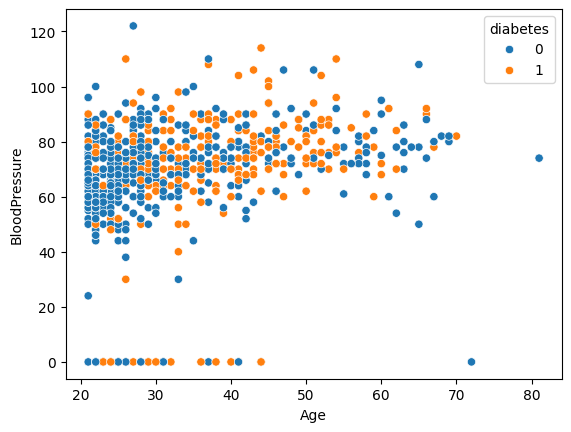

In [65]:
# Visualización 1:
# Una linea de codigo
sns.scatterplot(data=df, x='Age', y='BloodPressure', hue='diabetes')

Muestra que los pacientes con Diabetes tienen niveles de glucosa más altos que los que no tienen diabetes.
Nos muestra que la glucosa es uno de los factores más determinantes en diabetes.
La glucosa es un predictor muy fuerte de diabetes — la mayoría de pacientes con diabetes tienen glucosa > 140, mientras que sin diabetes suele estar < 120.


[Text(0.5, 0, 'Diabetes (0=No, 1=Sí)'),
 Text(0, 0.5, 'Glucosa'),
 Text(0.5, 1.0, 'Glucose distribution for diabetes')]

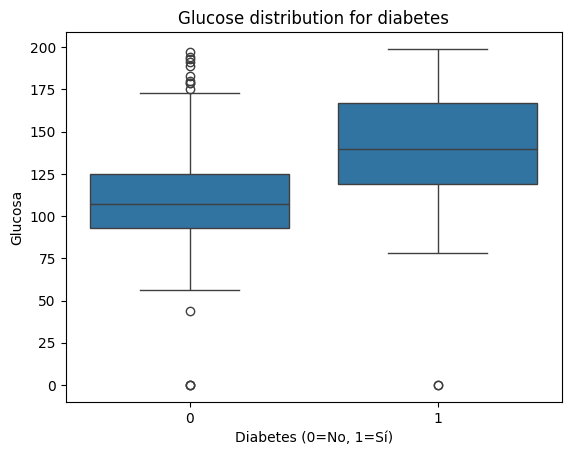

In [67]:
# Visualización 2:
sns.boxplot(data=df, x='diabetes', y='Glucose').set(xlabel='Diabetes (0=No, 1=Sí)', ylabel='Glucosa', title='Glucose distribution for diabetes')

Muestra una **matriz de correlacion** de las variables

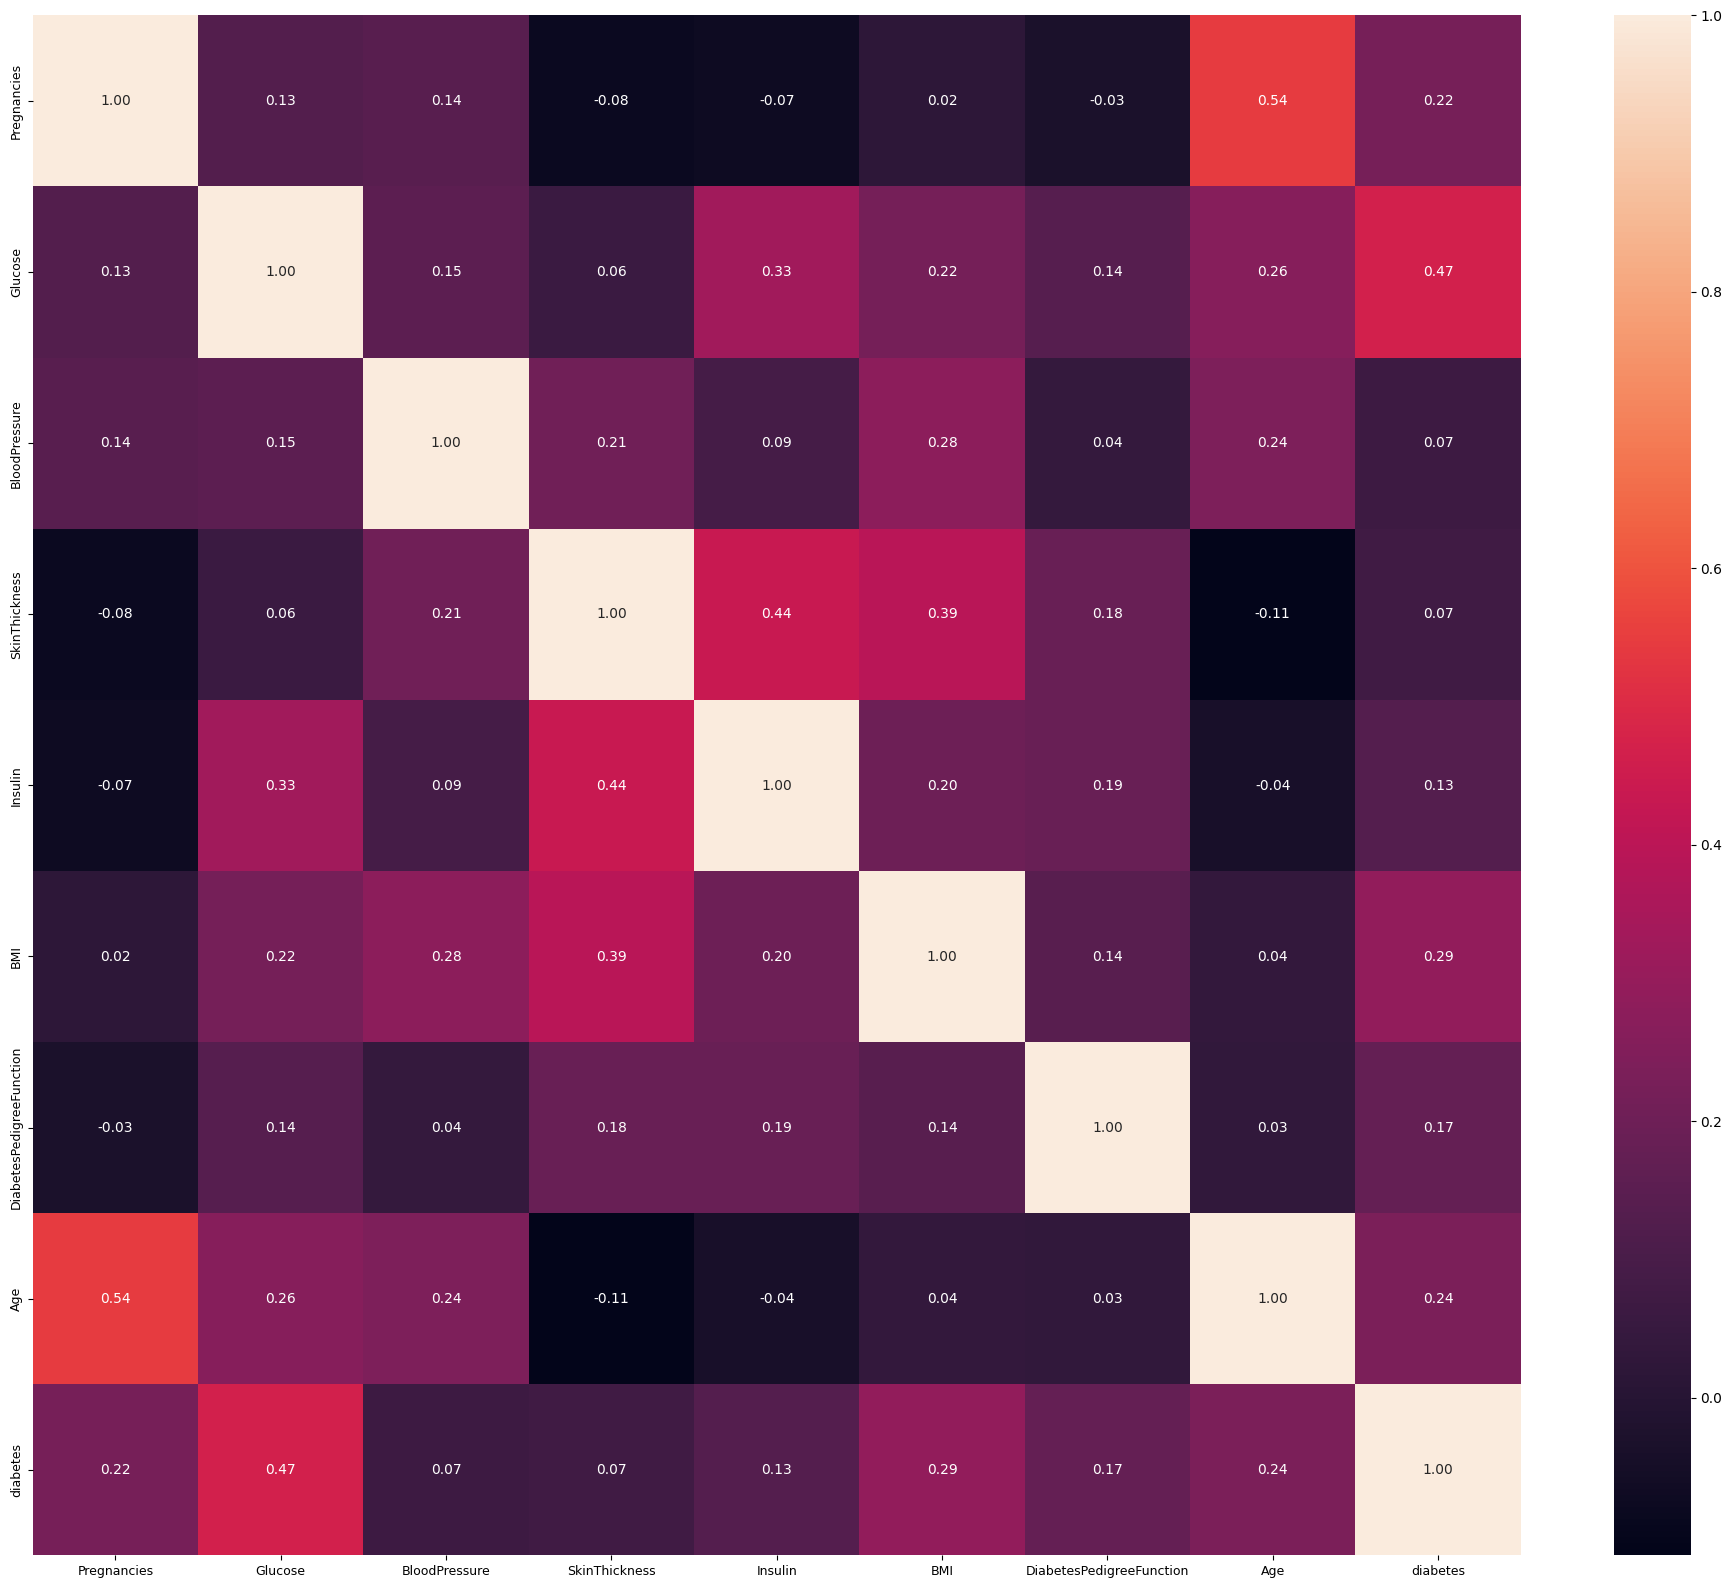

In [66]:
# Dos lineas de codigo
plt.figure(figsize=(24, 20))
sns.heatmap(df.corr(), annot=True, cmap='rocket', fmt='.2f', linewidths=0).tick_params(labelsize=9)

## División de conjuntos de entrenamientos y prueba
Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

In [68]:
# Separamos la variable que queremos que predecir y las que vamos a usar para predecir, llamalas x e y
x= df.drop('diabetes', axis=1)
y= df['diabetes']

Divide el dataset en los conjuntos de entrenamiento y prueba usando la función *train_test_split()* de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros *random_state* y *stratify*?

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

El parámetro random_state nos permite: establecer una semilla de forma que el conjunto de datos se divida aleatoriamente siempre de la misma manera para esa semilla, de modo que nos permita comparar los resultados de una ejecución con otra, es decir, hace que nuestros resultados sean reproducibles.

El parámetro stratify: hace que al dividir el dataset se conserve la proporción de las clases objetivo en ambos subconjuntos de datos que la que tiene el conjunto de datos de entrada.

## Normalizacion de los datos
Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

Normaliza los datos de entrenamiento y prueba usando la función *MinMaxScaler()* de la librería Scikit-Learn.

In [70]:
# Cuatro lineas de codigo
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## Entrenamiento del modelo
Vamos a usar el modelo k-Nearest Neighbors para crear un clasificador que nos permita predecir a partir de los datos que tenemos si el paciente tiene diabetes o no.

In [71]:
# Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona.
# Prueba diferentes valores de k, por ejemplo entre 1 y 20.
from sklearn.neighbors import KNeighborsClassifier

mejor_k = 0
mejor_test_score = 0
mejor_train_score = 0

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    print(f"Con k={k}, training score - {train_score} y test score - {test_score}")

    if test_score > mejor_test_score:
        mejor_test_score = test_score
        mejor_k = k
        mejor_train_score = train_score

print("-" * 30)
print(f"Mejor nº de vecinos - {mejor_k}")
print(f"Mejor training score - {round(mejor_train_score, 3)}")
print(f"Mejor test score - {round(mejor_test_score, 3)}")


Con k=1, training score - 1.0 y test score - 0.7552083333333334
Con k=2, training score - 0.8229166666666666 y test score - 0.7239583333333334
Con k=3, training score - 0.8506944444444444 y test score - 0.7864583333333334
Con k=4, training score - 0.8072916666666666 y test score - 0.7395833333333334
Con k=5, training score - 0.8055555555555556 y test score - 0.7552083333333334
Con k=6, training score - 0.7916666666666666 y test score - 0.7447916666666666
Con k=7, training score - 0.7951388888888888 y test score - 0.7395833333333334
Con k=8, training score - 0.7777777777777778 y test score - 0.7291666666666666
Con k=9, training score - 0.7673611111111112 y test score - 0.734375
Con k=10, training score - 0.765625 y test score - 0.7447916666666666
Con k=11, training score - 0.78125 y test score - 0.7604166666666666
Con k=12, training score - 0.7638888888888888 y test score - 0.75
Con k=13, training score - 0.7708333333333334 y test score - 0.7604166666666666
Con k=14, training score - 0.

(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.

Mínima tasa de error - 0.21354166666666663 en k=3


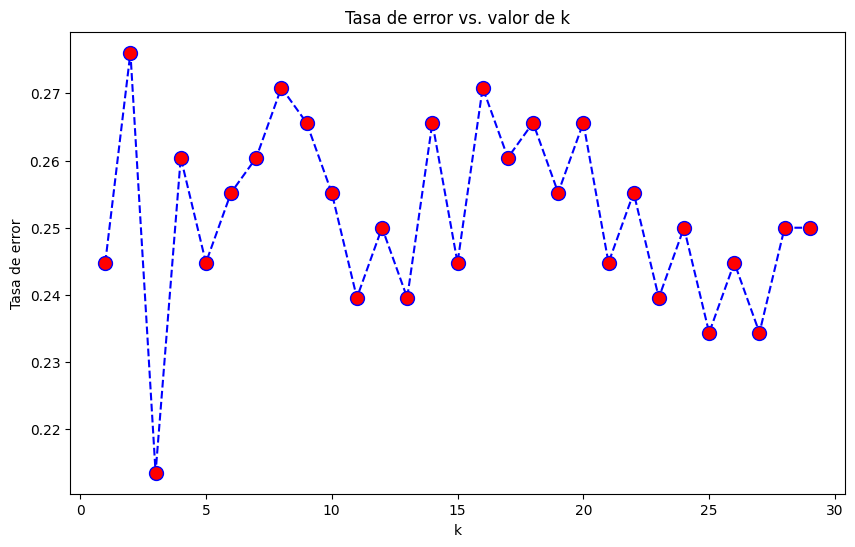

In [72]:
import matplotlib.pyplot as plt

# Creamos una lista para almacenar las tasas de error
error_rate = []

# Calculamos el error para cada k de 1 a 29
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    # El error es el promedio de las predicciones que no coinciden con el valor real
    error_rate.append(1 - knn.score(X_test_scaled, y_test))

# Configuramos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Tasa de error vs. valor de k')
plt.xlabel('k')
plt.ylabel('Tasa de error')

# Imprimimos el resultado de la mínima tasa de error
min_error = min(error_rate)
mejor_k_error = error_rate.index(min_error) + 1
print(f"Mínima tasa de error - {min_error} en k={mejor_k_error}")

plt.show()

(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.

Máximo accuracy - 0.7864583333333334 en k=3


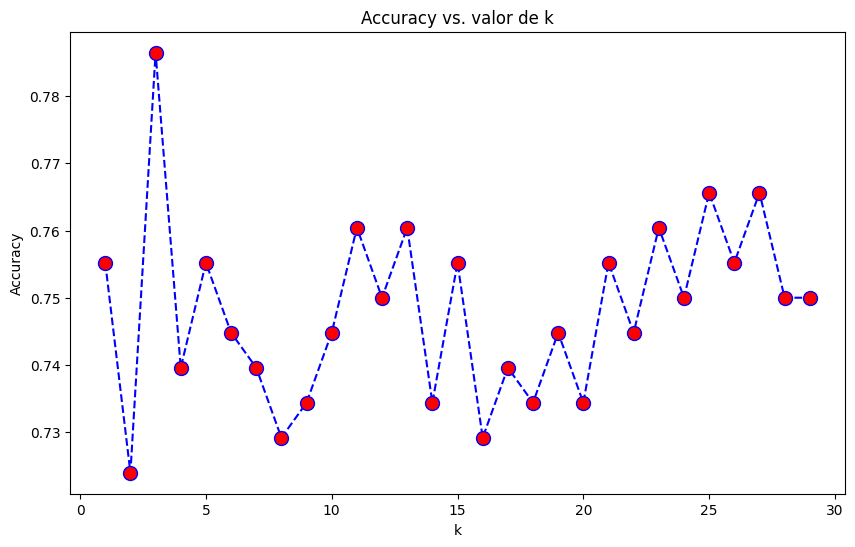

In [73]:
import matplotlib.pyplot as plt

# Lista para almacenar los valores de accuracy
accuracy_list = []

# Calculamos el accuracy para cada k de 1 a 29
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    accuracy_list.append(score)

# Configuramos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), accuracy_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. valor de k')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Calculamos e imprimimos el máximo accuracy
max_accuracy = max(accuracy_list)
mejor_k_acc = accuracy_list.index(max_accuracy) + 1
print(f"Máximo accuracy - {max_accuracy} en k={mejor_k_acc}")

plt.show()

### Entrena de nuevo
el clasificador con el k que has seleccionado.

In [74]:
knn = KNeighborsClassifier(n_neighbors=mejor_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Realiza predicciones

In [76]:
y_pred = knn.predict(X_test_scaled)

In [77]:
print(f"Predicciones:   {y_pred[:15]}")
print(f"Valores reales: {y_test[:15].values}")

Predicciones:   [0 0 1 0 0 0 1 0 0 0 1 0 1 1 0]
Valores reales: [0 0 0 0 0 0 1 1 0 1 0 1 1 1 0]


### Evalua el modelo
Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.

In [78]:
# Dos lineas de codigo
print(f"Training score: {knn.score(X_train_scaled, y_train):.3f}")
print(f"Test score    : {knn.score(X_test_scaled, y_test):.3f}")

Training score: 0.851
Test score    : 0.786


Muestra la matriz de confunsión para el clasificador.

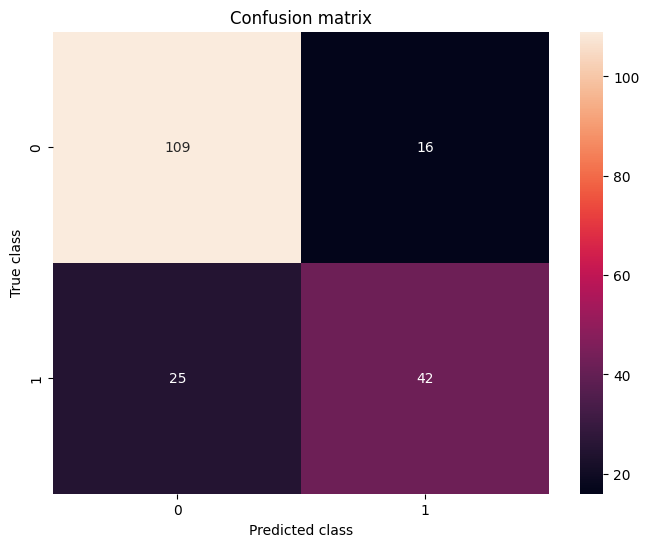

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generamos la matriz de números
cm = confusion_matrix(y_test, y_pred)

# 2. La visualizamos con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket') # 'rocket' es la paleta de colores de tu imagen

plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


Imprime el informe de clasificación. ¿Qué conclusiones sacas?

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.72      0.63      0.67        67

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



### EJERCICIO_ESTRELLA
https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification
https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Por último, crea una visualización con la **curva ROC** y la métrica del área bajo la curva.
**¿Para que sirve la curva ROC?** os dejamos un link:
--> https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0716-10182012000200003#:~:text=Un%20gr%C3%A1fico%20de%20curva%20ROC,escala%20de%20medici%C3%B3n%20es%20continua.

**Interpretad el resultado y explicarlo**

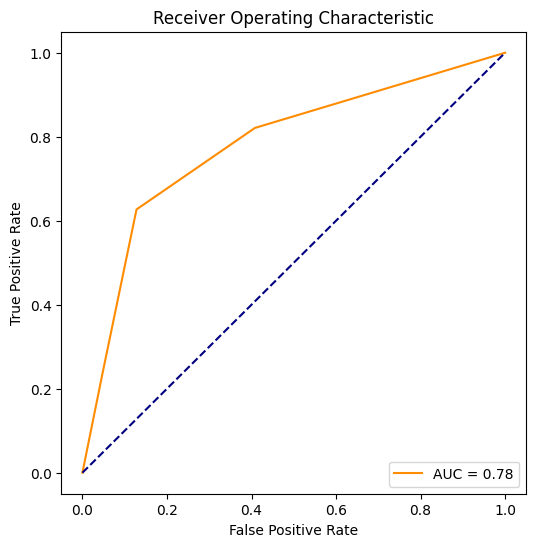

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Obtenemos las probabilidades de la clase positiva (1)
# Esto es necesario para la curva ROC en lugar de las etiquetas directas
y_scores = knn.predict_proba(X_test_scaled)[:, 1]

# 2. Calculamos los componentes de la curva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 3. Creamos la visualización
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Línea diagonal de referencia

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Utilizando las funciones de sklearn.metrics para calcular la curva ROC y el valor del área bajo la curva (AUC). Esta gráfica es fundamental para entender el equilibrio entre la sensibilidad (capacidad de detectar positivos) y la especificidad del modelo.

- AUC = 0.78: Este valor (0.78) indica que el modelo tiene una probabilidad del 78% de distinguir correctamente entre una paciente con diabetes y una sana. Se considera un rendimiento aceptable/bueno para un modelo base.

- La línea naranja: Cuanto más se aleje de la diagonal azul (hacia la esquina superior izquierda), mejor es el modelo. Tu curva muestra un ascenso rápido al principio, lo que significa que logra identificar a muchos positivos sin cometer demasiados errores iniciales.

- La diagonal azul: Representa un clasificador aleatorio (como lanzar una moneda). Al estar tu curva claramente por encima, confirmamos que el aprendizaje de KNN ha sido efectivo.